# Singular Value Decomposition (SVD)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m=5
n=3
A = np.random.rand(m, n)

In [4]:
U, s, Vt = np.linalg.svd(A)

In [5]:
U

array([[-0.63089088, -0.14289991, -0.32388581, -0.50759513, -0.46797594],
       [-0.12339332, -0.79733447, -0.34699036,  0.19796876,  0.43524465],
       [-0.08878189, -0.30251653,  0.26397758,  0.6323625 , -0.65653258],
       [-0.44350222,  0.50217624, -0.46763974,  0.55065331,  0.17093508],
       [-0.61820251, -0.01183802,  0.69736976, -0.00735874,  0.36236279]])

In [6]:
U.shape

(5, 5)

In [7]:
Vt

array([[-0.64140834, -0.31508397, -0.69951229],
       [-0.08052459, -0.87908873,  0.4698072 ],
       [ 0.76296208, -0.35766619, -0.53848283]])

In [8]:
Vt.shape

(3, 3)

In [9]:
s # s is a vector of the singular values, not a matrix!

array([1.62963773, 0.35785727, 0.31657686])

In [10]:
# U is a unitary matrix
U @ U.T

array([[ 1.00000000e+00,  2.68235603e-16, -2.72202442e-16,
         8.85683349e-17, -4.23559256e-16],
       [ 2.68235603e-16,  1.00000000e+00,  6.61868402e-17,
        -4.08740057e-17, -2.93086955e-16],
       [-2.72202442e-16,  6.61868402e-17,  1.00000000e+00,
        -4.29204073e-16,  2.50182622e-16],
       [ 8.85683349e-17, -4.08740057e-17, -4.29204073e-16,
         1.00000000e+00, -3.36237402e-16],
       [-4.23559256e-16, -2.93086955e-16,  2.50182622e-16,
        -3.36237402e-16,  1.00000000e+00]])

In [11]:
# Vt is a unitary matrix
Vt @ Vt.T

array([[1.00000000e+00, 5.11220606e-17, 8.32915436e-17],
       [5.11220606e-17, 1.00000000e+00, 1.42069200e-16],
       [8.32915436e-17, 1.42069200e-16, 1.00000000e+00]])

## Undoing the decomposition: Full SVD

There are two completely equivalent ways to recontruct the original matrix from U, s and Vt.

In the so-called full SVD we construct a S matrix by putting singular values along the diagonal and padding with zero rows

In [12]:
# Construct S matrix 
S = np.zeros([m,n])
S[:n,:n] = np.diagflat(s)

In [13]:
S

array([[1.62963773, 0.        , 0.        ],
       [0.        , 0.35785727, 0.        ],
       [0.        , 0.        , 0.31657686],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [14]:
USVt = U @ S @ Vt

In [15]:
np.allclose(A, USVt)

True

## Undoing the decomposition: Compact/Thin SVD

In the thin SVD, S is a square, diagonal matrix and we truncate U to n columns

In [16]:
S = np.diagflat(s)

In [17]:
S

array([[1.62963773, 0.        , 0.        ],
       [0.        , 0.35785727, 0.        ],
       [0.        , 0.        , 0.31657686]])

In [18]:
USVt = U[:, :n] @ S @ Vt

In [19]:
np.allclose(A, USVt)

True

## Truncating singular values
The SVD can be used as a way of approximating a matrix by one with a lower rank

In [20]:
n=100 # m => n
m=110
A = np.linalg.qr(np.random.rand(m, n))[0][:,:n] @ np.diagflat(np.exp(-0.1*np.arange(n))) @ np.linalg.qr(np.random.rand(n, m))[0]
U, s, Vt = np.linalg.svd(A)

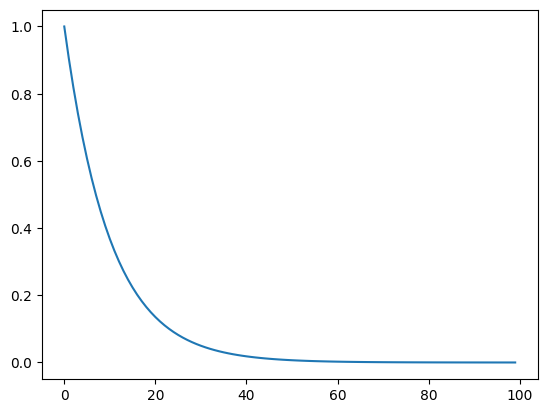

In [21]:
plt.plot(s)

In [22]:
# Remove singular values that are smaller than a certain threshold
sv_cutoff = 0.001
r = np.count_nonzero(s >= sv_cutoff * max(s))

In [23]:
r

70

In [24]:
A_rank_approx = U[:,:r] @ np.diagflat(s[:r]) @ Vt[:r,:]

In [25]:
# A_rank_approx is the best rank r approximation for A if the error is measure by the Frobenius norm:
np.linalg.norm(A - A_rank_approx)

0.002139132268475513

In [26]:
discarded_singular_values = s[r:]

In [27]:
# Error is equal to the square root of the sum of the squares of the discarded singular values
np.sqrt(sum(discarded_singular_values**2))

0.0021391322684755094